# Intro

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import common
common.configure_logging(level='debug')

DEBUG:root:Done configuring logging!


In [ ]:
from biodata import *

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
import functions as fn

In [ ]:
%matplotlib inline

# Load data

## Cell info

In [6]:
cell_info = pd.read_csv(
    '../downloads/challenge_data/sanger_molecular_data/'
    'cell_info.csv/cell_info.csv',
    sep=',',
)

In [7]:
cell_info = cell_info.rename(columns={
    'Sanger.Name': 'c',
    'CCLE.Name': 'cell_line_ccle',
    'Alternative.Name': 'cell_line_alternative',
    'Disease.Area': 'cell_line_disease_area',
    'Tissue..General.': 'cell_line_tissue',
    'COSMIC': 'cell_line_cosmic',
})

In [8]:
cell_info.head()

c         cell_line_ccle cell_line_alternative cell_line_disease_area     cell_line_tissue  cell_line_cosmic
0     22RV1         22RV1_PROSTATE                 22RV1                Urology  male genital system            924100
1     647-V     647V_URINARY_TRACT                  647V                Urology        urinary tract            906797
2      A549              A549_LUNG                  A549                   Lung                 lung            905949
3  BFTC-905  BFTC905_URINARY_TRACT               BFTC905                Urology        urinary tract            910926
4     BT-20            BT20_BREAST                  BT20                 Breast               breast            906801

## CSS

In [9]:
css = pd.read_sql_query("""\
SELECT c, avg(synergy_score) synergy_score
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY
where synergy_score is not null
group by c;
""", sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream_2015'))

In [10]:
css = css.set_index('c')['synergy_score']

In [11]:
css.head()

c
22RV1       -8.601674
647-V       13.834063
A549        21.671942
BFTC-905    21.839952
BT-20       22.283808
Name: synergy_score, dtype: float64

## GSS

In [12]:
dss = pd.read_sql_query("""\
SELECT d, avg(synergy_score) synergy_score
FROM (
    SELECT d_1 d, synergy_score
    FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY
    where synergy_score is not null
    UNION ALL
    SELECT d_2 d, synergy_score
    FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY
    where synergy_score is not null
) t
group by d;
""", sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream_2015'))

In [13]:
dss = dss.set_index('d')

In [14]:
dss.head()

synergy_score
d                     
ADAM17        3.639117
AKT           4.981951
AKT_1        12.759452
AKT_SGK       9.716044
ALK          12.950270

## Mutations

In [15]:
mutations = pd.read_csv(
    '../downloads/challenge_data/sanger_molecular_data/'
    'mutations.csv/mutations.csv',
    sep=',', low_memory=False,
)

In [16]:
mutations = mutations.rename(columns={
    'Gene.name': 'g',
    'cell_line_name': 'c',
})

In [17]:
display(mutations.head(2))
print(mutations.shape)

g Accession.Number  Gene.CDS.length  HGNC.ID        c  ID_sample  ID_tumour Primary.site Site.subtype Primary.histology Histology.subtype Genome.wide.screen Mutation.ID Mutation.CDS Mutation.AA     Mutation.Description Mutation.zygosity  GRCh Mutation.genome.position strand SNP FATHMM.prediction                       Mutation.somatic.status  Pubmed_PMID  ID_STUDY                                Institute                       Institute.Address Catalogue.Number Sample.source Tumour.origin  Age           Comments
0  FRMD4A  ENST00000357447             3120    25491  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM109920    c.1049C>T     p.S350L  Substitution - Missense               het    38     10:13693966-13693966      -   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II
1  LILRB1  ENST00000396331             1953     6605  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM162161    c.1690G>A     p.E564K  Substitution - Missense               het    38     19:54636536-54636536      +   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II

(75281, 32)


In [18]:
mutations.columns = [c.replace('.', '_').lower() for c in mutations.columns]

In [19]:
mutations.head(2)

g accession_number  gene_cds_length  hgnc_id        c  id_sample  id_tumour primary_site site_subtype primary_histology histology_subtype genome_wide_screen mutation_id mutation_cds mutation_aa     mutation_description mutation_zygosity  grch mutation_genome_position strand snp fathmm_prediction                       mutation_somatic_status  pubmed_pmid  id_study                                institute                       institute_address catalogue_number sample_source tumour_origin  age           comments
0  FRMD4A  ENST00000357447             3120    25491  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM109920    c.1049C>T     p.S350L  Substitution - Missense               het    38     10:13693966-13693966      -   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II
1  LILRB1  ENST00000396331             1953     6605  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM162161    c.1690G>A     p.E564K  Substitution - Missense               het    38     19:54636536-54636536      +   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II

## Gene subsets

### CGS

In [20]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/cosmic')
cancer_gene_census = pd.read_sql_table('cancer_gene_census', engine)

In [21]:
cancer_gene_census.head(2)

gene_symbol                                               name  entrez_geneid        genome_location chr_band somatic germline tumour_types_somatic tumour_types_germline cancer_syndrome tissue_type molecular_genetics mutation_types translocation_partner other_germline_mut other_syndrome                                           synonyms
0        ABI1                                   abl-interactor 1          10006   10:26748570-26860863  10p11.2     yes     None                  AML                  None            None           L                Dom              T                 KMT2A               None           None                      ABI1,E3B1,ABI-1,SSH3BP1,10006
1        ABL1  v-abl Abelson murine leukemia viral oncogene h...             25  9:130835447-130885683   9q34.1     yes     None      CML, ALL, T-ALL                  None            None           L                Dom         T, Mis     BCR, ETV6, NUP214               None           None  ABL1,p150,ABL,c-ABL,JTK7,bcr/abl,v-abl,P00519,...

In [22]:
cgs_genes = set(cancer_gene_census['gene_symbol'])

### Target

In [23]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream_2015')
drug_to_hgnc_target = pd.read_sql_table('drug_to_hgnc_target', engine)
drug_to_hgnc_target.head(2)

drug hgnc_name
0  ADAM17    ADAM17
1     AKT      AKT1

In [24]:
target_genes = set(drug_to_hgnc_target['hgnc_name'])

# Cell line info

## Useless

In [25]:
mutations['c'].drop_duplicates().shape

(85,)

In [26]:
mutations[['c', 'id_sample']].drop_duplicates().shape

(85, 2)

In [27]:
mutations[['c', 'id_tumour']].drop_duplicates().shape

(85, 2)

In [28]:
mutations[['c', 'sample_source']].drop_duplicates().shape

(85, 2)

In [29]:
Counter(mutations['sample_source'])

Counter({'cell-line': 75281})

In [30]:
mutations[['c', 'genome_wide_screen']].drop_duplicates().shape

(85, 2)

In [31]:
Counter(mutations['genome_wide_screen'].values)

Counter({'y': 75281})

In [32]:
mutations[['c', 'comments']].drop_duplicates().shape

(85, 2)

In [33]:
Counter(mutations['comments'])

Counter({nan: 46102,
         'Metastatic site:stomach': 383,
         'Metastatic site:pleural effusion': 9292,
         'Stage:I': 387,
         'Stage:IV': 1611,
         'Metastatic site:lymph node': 1728,
         'Grade:I,Metastatic site:NA': 980,
         'Metastatic site:central nervous system': 1985,
         'Grade:II,Stage:II': 558,
         'Grade:III,Metastatic site:lymph node,Stage:III': 937,
         'Stage:III,Metastatic site:NA': 530,
         'Grade:II,Stage:IV': 611,
         'Grade:IV,Metastatic site:lymph node,Stage:III': 2837,
         'Metastatic site:skin': 460,
         'Metastatic site:ascites': 591,
         'Metastatic site:ascitic fluid': 1044,
         'Metastatic site:mediastinum': 516,
         'Stage:III': 2902,
         'Stage:II': 908,
         'Grade:II,Stage:III': 215,
         'Metastatic site:bone marrow': 704})

## Useful

In [34]:
Counter(mutations['tumour_origin'])

Counter({'NS': 4069, 'metastasis': 16529, 'primary': 54683})

In [35]:
mutations[['c', 'age']].drop_duplicates().shape

(85, 2)

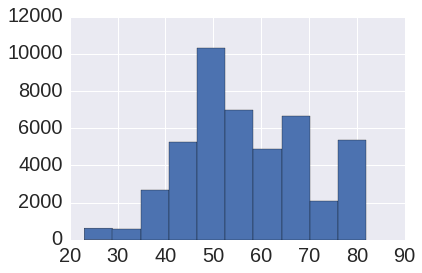

In [36]:
mutations['age'].hist()

In [37]:
mutations[['c', 'primary_histology']].drop_duplicates().shape

(85, 2)

In [38]:
Counter(mutations['primary_histology'].values)

Counter({'carcinoma': 70922,
         'lymphoid_neoplasm': 1212,
         'malignant_melanoma': 3147})

In [39]:
mutations[['c', 'histology_subtype']].drop_duplicates().shape

(85, 2)

In [40]:
Counter(mutations['histology_subtype'].values)

Counter({'NS': 30985,
         'adenocarcinoma': 17017,
         'bronchioloalveolar_adenocarcinoma': 1693,
         'ductal_carcinoma': 9286,
         'mixed_adenosquamous_carcinoma': 980,
         'non_small_cell_carcinoma': 8347,
         'plasma_cell_myeloma': 1212,
         'small_cell_carcinoma': 516,
         'squamous_cell_carcinoma': 734,
         'transitional_cell_carcinoma': 4511})

# Mutation info

## mutation_description

In [41]:
Counter(mutations['mutation_description'].values)

Counter({'Complex - compound substitution': 1,
         'Complex - deletion inframe': 28,
         'Complex - frameshift': 33,
         'Complex - insertion inframe': 1,
         'Deletion - Frameshift': 3017,
         'Deletion - In frame': 334,
         'Insertion - Frameshift': 1029,
         'Insertion - In frame': 102,
         'Nonstop extension': 53,
         'Substitution - Missense': 43378,
         'Substitution - Nonsense': 2609,
         'Substitution - coding silent': 18537,
         'Unknown': 6159})

In [42]:
mutations['f_mutation_very_bad'] = (
    (mutations['mutation_description'] == 'Complex - compound substitution') |
    (mutations['mutation_description'] == 'Complex - deletion inframe') |
    (mutations['mutation_description'] == 'Complex - frameshift') | 
    (mutations['mutation_description'] == 'Complex - insertion inframe') | 
    (mutations['mutation_description'] == 'Deletion - Frameshift') | 
    (mutations['mutation_description'] == 'Insertion - Frameshift') |
    (mutations['mutation_description'] == 'Substitution - Nonsense')
).astype(int)

mutations['f_mutation_maybe_bad'] = (
    (mutations['mutation_description'] == 'Deletion - In frame') |
    (mutations['mutation_description'] == 'Insertion - In frame') |
    (mutations['mutation_description'] == 'Nonstop extension') | 
    (mutations['mutation_description'] == 'Substitution - Missense')
).astype(int)

mutations['f_mutation_mild'] = (
    (mutations['mutation_description'] == 'Substitution - coding silent')
).astype(int)

## mutation_zygosity

In [43]:
Counter(mutations['mutation_zygosity'].values)

Counter({'het': 68066, 'hom': 7215})

In [44]:
mutations['f_homozygous'] = (mutations['mutation_zygosity'] == 'hom').astype(int)

## snp

In [45]:
Counter(mutations['snp'].values)

Counter({nan: 2098, 'y': 1791, 'n': 71392})

In [46]:
mutations['f_snp'] = (mutations['snp'] == 'y').astype(int)

## fathmm_prediction

In [47]:
Counter(mutations['fathmm_prediction'].values)

Counter({nan: 70187, 'CANCER': 658, 'PASSENGER/OTHER': 4436})

## mutation_somatic_status

In [48]:
Counter(mutations['mutation_somatic_status'].values)

Counter({'Confirmed somatic variant': 160,
         'Reported in another cancer sample as somatic': 7618,
         'Variant of unknown origin': 67503})

In [49]:
mutations['f_maybe_somatic'] = (
    (mutations['mutation_somatic_status'] == 'Confirmed somatic variant') | 
    (mutations['mutation_somatic_status'] == 'Reported in another cancer sample as somatic')
).astype(int)

# Save

In [50]:
import csv2sql
db = csv2sql.DataFrameToMySQL(
    'mysql://strokach:@192.168.6.19:3306/az_dream_2015_features', 
    'cnv', 
    '192.168.6.8', 
    echo=False
)

In [51]:
import csv2sql.g2d

## gc

In [52]:
mutations_gbgc_gp = (
    mutations
    .groupby(['g', 'gene_cds_length', 'c'])
)

In [53]:
mutations_gbgc = (
    mutations_gbgc_gp
    .agg({
        'mutation_aa': 'count',
        'f_maybe_somatic': 'sum',
        'f_snp': 'sum',
        'f_homozygous': 'sum',
        'f_mutation_very_bad': 'sum',
        'f_mutation_maybe_bad': 'sum',
        'f_mutation_mild': 'sum',
    }).rename(columns={'mutation_aa': 'f_mutation'})
    .reset_index()
)

In [54]:
columns_to_drop = ['gene_cds_length']
for column in mutations_gbgc:
    if not column.startswith('f_'):
        continue
    mutations_gbgc[column + '_density'] = mutations_gbgc[column] / mutations_gbgc['gene_cds_length']
    columns_to_drop.append(column)

mutations_gbgc.drop(pd.Index(columns_to_drop), axis=1, inplace=True)
mutations_gbgc.columns = [((c + '_gbgc') if c not in ['g', 'c'] else c) for c in mutations_gbgc.columns]

In [55]:
mutations_gbgc.head(10)

g           c  f_mutation_maybe_bad_density_gbgc  f_snp_density_gbgc  f_maybe_somatic_density_gbgc  f_mutation_mild_density_gbgc  f_mutation_very_bad_density_gbgc  f_mutation_density_gbgc  f_homozygous_density_gbgc
0  A1BG      CAL-51                           0.000000                   0                             0                      0.000672                                 0                 0.000672                          0
1  A1BG     HCC1500                           0.000000                   0                             0                      0.000672                                 0                 0.000672                          0
2  A1BG     HCC1806                           0.000000                   0                             0                      0.000672                                 0                 0.000672                          0
3  A1BG  MDA-MB-415                           0.000000                   0                             0                      0.000672                                 0                 0.000672                          0
4  A1BG         RKO                           0.000672                   0                             0                      0.000000                                 0                 0.000672                          0
5  A1CF       22RV1                           0.000568                   0                             0                      0.000000                                 0                 0.000568                          0
6  A1CF     HCC1569                           0.000568                   0                             0                      0.000000                                 0                 0.000568                          0
7  A1CF     KATOIII                           0.000568                   0                             0                      0.000000                                 0                 0.000568                          0
8  A1CF   NCI-H1793                           0.000568                   0                             0                      0.000000                                 0                 0.000568                          0
9  A1CF    NCI-H358                           0.000568                   0                             0                      0.000000                                 0                 0.000568                          0

In [56]:
db.import_table(
    mutations_gbgc,
    'mutations_gbgc', [
        [('g', 'c'), True],
        [('c', 'g'), False],
    ],
)

DEBUG:csv2sql.core:Uncompressing file...
INFO:csv2sql.core:bzip2 -dkf '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbgc.tsv.bz2'
DEBUG:csv2sql.core:Running on host: '192.168.6.8'
DEBUG:csv2sql.core:Initializing SSH client: '192.168.6.8'
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Loading data into MySQL table: 'mutations_gbgc'...
INFO:csv2sql.core:mysql --local-infile -h 192.168.6.19 -P 3306 -u strokach  az_dream_2015_features -e "load data local infile '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbgc.tsv' into table `mutations_gbgc` ignore 1 lines;  show warnings;" 
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Removing uncompressed file '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbgc.tsv'...
INFO:csv2sql.core:rm -f '/home/kimlab1/database_dat

In [57]:
csv2sql.g2d.g2d('mutations_gbgc')

Unknown ending for column: f_mutation_maybe_bad_density_gbgc. Assuming mean...
Unknown ending for column: f_snp_density_gbgc. Assuming mean...
Unknown ending for column: f_maybe_somatic_density_gbgc. Assuming mean...
Unknown ending for column: f_mutation_mild_density_gbgc. Assuming mean...
Unknown ending for column: f_mutation_very_bad_density_gbgc. Assuming mean...
Unknown ending for column: f_mutation_density_gbgc. Assuming mean...
Unknown ending for column: f_homozygous_density_gbgc. Assuming mean...
DROP TABLE IF EXISTS az_dream_2015_features.mutations_gbdc;

CREATE TABLE az_dream_2015_features.mutations_gbdc AS
SELECT
d2t.drug d,
t.c c,
avg(t.f_mutation_maybe_bad_density_gbgc) f_mutation_maybe_bad_density_gbgc_mean,
avg(t.f_snp_density_gbgc) f_snp_density_gbgc_mean,
avg(t.f_maybe_somatic_density_gbgc) f_maybe_somatic_density_gbgc_mean,
avg(t.f_mutation_mild_density_gbgc) f_mutation_mild_density_gbgc_mean,
avg(t.f_mutation_very_bad_density_gbgc) f_mutation_very_bad_density_gbgc_mea

## g

In [58]:
mutations_gbg_gp = (
    mutations
    .groupby(['g', 'gene_cds_length'])
)

In [59]:
mutations_gbg = (
    mutations_gbg_gp
    .agg({
        'mutation_aa': 'count',
        'f_maybe_somatic': 'sum',
        'f_snp': 'sum',
        'f_homozygous': 'sum',
        'f_mutation_very_bad': 'sum',
        'f_mutation_maybe_bad': 'sum',
        'f_mutation_mild': 'sum',
    }).rename(columns={'mutation_aa': 'f_mutation'})
    .reset_index()
)

In [60]:
columns_to_drop = ['gene_cds_length']
for column in mutations_gbg:
    if not column.startswith('f_'):
        continue
    mutations_gbg[column + '_density'] = mutations_gbg[column] / mutations_gbg['gene_cds_length']
    columns_to_drop.append(column)

mutations_gbg.drop(pd.Index(columns_to_drop), axis=1, inplace=True)
mutations_gbg.columns = [((c + '_gbg') if c not in ['g', 'c'] else c) for c in mutations_gbg.columns]

In [61]:
mutations_gbg.head()

g  f_mutation_maybe_bad_density_gbg  f_snp_density_gbg  f_maybe_somatic_density_gbg  f_mutation_mild_density_gbg  f_mutation_very_bad_density_gbg  f_mutation_density_gbg  f_homozygous_density_gbg
0                  A1BG                          0.000672           0.000000                            0                     0.002688                                0                0.003360                         0
1                  A1CF                          0.002839           0.000000                            0                     0.000000                                0                0.002839                         0
2  A1CF_ENST00000282641                          0.002801           0.000000                            0                     0.000000                                0                0.002801                         0
3  A1CF_ENST00000373995                          0.002801           0.000000                            0                     0.000000                                0                0.002801                         0
4                   A2M                          0.000678           0.000226                            0                     0.000678                                0                0.002034                         0

In [62]:
db.import_table(
    mutations_gbg,
    'mutations_gbg', [
        [('g'), True],
    ],
)

DEBUG:csv2sql.core:Uncompressing file...
INFO:csv2sql.core:bzip2 -dkf '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbg.tsv.bz2'
DEBUG:csv2sql.core:Running on host: '192.168.6.8'
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Loading data into MySQL table: 'mutations_gbg'...
INFO:csv2sql.core:mysql --local-infile -h 192.168.6.19 -P 3306 -u strokach  az_dream_2015_features -e "load data local infile '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbg.tsv' into table `mutations_gbg` ignore 1 lines;  show warnings;" 
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Removing uncompressed file '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbg.tsv'...
INFO:csv2sql.core:rm -f '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbg.tsv

In [63]:
csv2sql.g2d.g2d('mutations_gbg')

Unknown ending for column: f_mutation_maybe_bad_density_gbg. Assuming mean...
Unknown ending for column: f_snp_density_gbg. Assuming mean...
Unknown ending for column: f_maybe_somatic_density_gbg. Assuming mean...
Unknown ending for column: f_mutation_mild_density_gbg. Assuming mean...
Unknown ending for column: f_mutation_very_bad_density_gbg. Assuming mean...
Unknown ending for column: f_mutation_density_gbg. Assuming mean...
Unknown ending for column: f_homozygous_density_gbg. Assuming mean...
DROP TABLE IF EXISTS az_dream_2015_features.mutations_gbd;

CREATE TABLE az_dream_2015_features.mutations_gbd AS
SELECT
d2t.drug d,
avg(t.f_mutation_maybe_bad_density_gbg) f_mutation_maybe_bad_density_gbg_mean,
avg(t.f_snp_density_gbg) f_snp_density_gbg_mean,
avg(t.f_maybe_somatic_density_gbg) f_maybe_somatic_density_gbg_mean,
avg(t.f_mutation_mild_density_gbg) f_mutation_mild_density_gbg_mean,
avg(t.f_mutation_very_bad_density_gbg) f_mutation_very_bad_density_gbg_mean,
avg(t.f_mutation_densit

## c

In [64]:
useful_features = [
    'tumour_origin', 'age', 'primary_histology', 'histology_subtype',
]
mutations_gbc_head = (
    pd.get_dummies(mutations[['c'] + useful_features].drop_duplicates().set_index('c'))
    .reset_index()
)
mutations_gbc_head.head()

c  age  tumour_origin_NS  tumour_origin_metastasis  tumour_origin_primary  primary_histology_carcinoma  primary_histology_lymphoid_neoplasm  primary_histology_malignant_melanoma  histology_subtype_NS  histology_subtype_adenocarcinoma  histology_subtype_bronchioloalveolar_adenocarcinoma  histology_subtype_ductal_carcinoma  histology_subtype_mixed_adenosquamous_carcinoma  histology_subtype_non_small_cell_carcinoma  histology_subtype_plasma_cell_myeloma  histology_subtype_small_cell_carcinoma  histology_subtype_squamous_cell_carcinoma  histology_subtype_transitional_cell_carcinoma
0    HCC1806   60                 0                         0                      1                            1                                    0                                     0                     0                                 0                                                  0                                     1                                                0                                           0                                      0                                       0                                          0                                              0
1   NCI-H358  NaN                 0                         0                      1                            1                                    0                                     0                     0                                 0                                                  1                                     0                                                0                                           0                                      0                                       0                                          0                                              0
2  NCI-H3122  NaN                 1                         0                      0                            1                                    0                                     0                     0                                 1                                                  0                                     0                                                0                                           0                                      0                                       0                                          0                                              0
3   NCI-H747   69                 0                         1                      0                            1                                    0                                     0                     0                                 1                                                  0                                     0                                                0                                           0                                      0                                       0                                          0                                              0
4       T-24   81                 0                         0                      1                            1                                    0                                     0                     1                                 0                                                  0                                     0                                                0                                           0                                      0                                       0                                          0                                              0

In [65]:
mutations_gbc = (
    mutations_gbgc
    .groupby('c')
    .agg(['max', 'min', 'mean', 'std', 'median'])
    .rename(columns=lambda x: x.replace('_gbgc', '_gbc'))
    .reset_index()
)
mutations_gbc.columns = ['_'.join(c).strip('_') for c in mutations_gbc.columns]

In [66]:
mutations_gbc.head()

c  f_mutation_maybe_bad_density_gbc_max  f_mutation_maybe_bad_density_gbc_min  f_mutation_maybe_bad_density_gbc_mean  f_mutation_maybe_bad_density_gbc_std  f_mutation_maybe_bad_density_gbc_median  f_snp_density_gbc_max  f_snp_density_gbc_min  f_snp_density_gbc_mean  f_snp_density_gbc_std  f_snp_density_gbc_median  f_maybe_somatic_density_gbc_max  f_maybe_somatic_density_gbc_min  f_maybe_somatic_density_gbc_mean  f_maybe_somatic_density_gbc_std  f_maybe_somatic_density_gbc_median  f_mutation_mild_density_gbc_max  f_mutation_mild_density_gbc_min  f_mutation_mild_density_gbc_mean  f_mutation_mild_density_gbc_std  f_mutation_mild_density_gbc_median  f_mutation_very_bad_density_gbc_max  f_mutation_very_bad_density_gbc_min  f_mutation_very_bad_density_gbc_mean  f_mutation_very_bad_density_gbc_std  f_mutation_very_bad_density_gbc_median  f_mutation_density_gbc_max  f_mutation_density_gbc_min  f_mutation_density_gbc_mean  f_mutation_density_gbc_std  f_mutation_density_gbc_median  \
0     22RV1                              0.005848                                     0                               0.000350                              0.000517                                 0.000180               0.001883                      0                0.000011               0.000089                         0                         0.003003                                0                          0.000068                         0.000244                                   0                         0.007407                                0                          0.000140                         0.000364                                   0                             0.004065                                    0                              0.000121                             0.000354                                       0                    0.007407                    0.000039                     0.000657                    0.000584                       0.000495   
1     647-V                              0.003788                                     0                               0.000370                              0.000520                                 0.000207               0.002208                      0                0.000025               0.000177                         0                         0.003663                                0                          0.000043                         0.000228                                   0                         0.003300                                0                          0.000151                         0.000353                                   0                             0.002646                                    0                              0.000055                             0.000251                                       0                    0.004016                    0.000010                     0.000640                    0.000582                       0.000481   
2      A549                              0.003546                                     0                               0.000334                              0.000449                                 0.000193               0.001927                      0                0.000019               0.000140                         0                         0.003546                                0                          0.000149                         0.000356                                   0                         0.002825                                0                          0.000119                         0.000299                                   0                             0.002646                                    0                              0.000056                             0.000247                                       0                    0.003546                    0.000010                     0.000561                    0.000482                       0.000447   
3  BFTC-905   

In [67]:
mutations_gbc_all = (
    mutations_gbc_head
    .merge(mutations_gbc, on=['c'], how='outer')
)

In [68]:
mutations_gbc_all.head()

c  age  tumour_origin_NS  tumour_origin_metastasis  tumour_origin_primary  primary_histology_carcinoma  primary_histology_lymphoid_neoplasm  primary_histology_malignant_melanoma  histology_subtype_NS  histology_subtype_adenocarcinoma  histology_subtype_bronchioloalveolar_adenocarcinoma  histology_subtype_ductal_carcinoma  histology_subtype_mixed_adenosquamous_carcinoma  histology_subtype_non_small_cell_carcinoma  histology_subtype_plasma_cell_myeloma  histology_subtype_small_cell_carcinoma  histology_subtype_squamous_cell_carcinoma  histology_subtype_transitional_cell_carcinoma  f_mutation_maybe_bad_density_gbc_max  f_mutation_maybe_bad_density_gbc_min  f_mutation_maybe_bad_density_gbc_mean  f_mutation_maybe_bad_density_gbc_std  f_mutation_maybe_bad_density_gbc_median  f_snp_density_gbc_max  f_snp_density_gbc_min  f_snp_density_gbc_mean  f_snp_density_gbc_std  f_snp_density_gbc_median  f_maybe_somatic_density_gbc_max  f_maybe_somatic_density_gbc_min  \
0    HCC1806   60                 0                         0                      1                            1                                    0                                     0                     0                                 0                                                  0                                     1                                                0                                           0                                      0                                       0                                          0                                              0                              0.004016                                     0                               0.000374                              0.000533                                 0.000211               0.001086                      0                0.000028               0.000137                         0                         0.002110                                0   
1   NCI-H358  NaN                 0                         0                      1                            1                                    0                                     0                     0                                 0                                                  1                                     0                                                0                                           0                                      0                                       0                                          0                                              0                              0.004329                                     0                               0.000399                              0.000528                                 0.000252               0.001199                      0                0.000012               0.000091                         0                         0.003268                                0   
2  NCI-H3122  NaN                 1                         0                      0                            1                                    0                                     0                     0                                 1                                                  0                                     0                                                0                                           0                                      0                                       0                                          0                                              0                              0.015152                                     0                               0.000380                              0.000827                                 0.000232               0.003831                      0                0.000026               0.000227                         0                         0.001475                                0   
3   NCI-H747   69                 0                         1                      0               

In [69]:
mutations_gbc_all.shape

(85, 53)

In [70]:
db.import_table(
    mutations_gbc_all,
    'mutations_gbc', [
        [('c'), True],
    ],
)

DEBUG:csv2sql.core:Uncompressing file...
INFO:csv2sql.core:bzip2 -dkf '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbc.tsv.bz2'
DEBUG:csv2sql.core:Running on host: '192.168.6.8'
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Loading data into MySQL table: 'mutations_gbc'...
INFO:csv2sql.core:mysql --local-infile -h 192.168.6.19 -P 3306 -u strokach  az_dream_2015_features -e "load data local infile '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbc.tsv' into table `mutations_gbc` ignore 1 lines;  show warnings;" 
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Removing uncompressed file '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbc.tsv'...
INFO:csv2sql.core:rm -f '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbc.tsv

## cc

### Cell line info

In [71]:
cell_info.sort_values('c', inplace=True)

In [72]:
cell_tissue_similarity = []
for cell_name_1, cell_tissue_1 in cell_info[['c', 'cell_line_tissue']].values:
    for cell_name_2, cell_tissue_2 in cell_info[['c', 'cell_line_tissue']].values:
        row = (cell_name_1, cell_name_2, int(cell_tissue_1 == cell_tissue_2),)
        cell_tissue_similarity.append(row)
cell_tissue_similarity_df = pd.DataFrame(cell_tissue_similarity, columns=['c_x', 'c_y', 'same_cell_tissue_gbcc'])

In [73]:
assert cell_tissue_similarity_df.shape[0] == 85 * 85

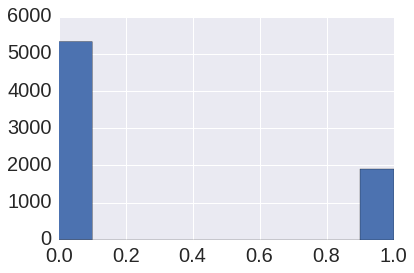

In [74]:
cell_tissue_similarity_df['same_cell_tissue_gbcc'].hist()

In [75]:
cell_tissue_similarity_df.head()

c_x       c_y  same_cell_tissue_gbcc
0  22RV1     22RV1                      1
1  22RV1     647-V                      0
2  22RV1      A549                      0
3  22RV1  BFTC-905                      0
4  22RV1     BT-20                      0

In [76]:
db.import_table(
    cell_tissue_similarity_df, 
    'cell_info_gbcc', [
        [('c_x', 'c_y'), True],
        [('c_y', 'c_x'), False],
    ],
)

DEBUG:csv2sql.core:Uncompressing file...
INFO:csv2sql.core:bzip2 -dkf '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/cell_info_gbcc.tsv.bz2'
DEBUG:csv2sql.core:Running on host: '192.168.6.8'
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Loading data into MySQL table: 'cell_info_gbcc'...
INFO:csv2sql.core:mysql --local-infile -h 192.168.6.19 -P 3306 -u strokach  az_dream_2015_features -e "load data local infile '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/cell_info_gbcc.tsv' into table `cell_info_gbcc` ignore 1 lines;  show warnings;" 
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Removing uncompressed file '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/cell_info_gbcc.tsv'...
INFO:csv2sql.core:rm -f '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/cell_info_gb

### Cell cell correlation

In [77]:
mutations.head(2)

g accession_number  gene_cds_length  hgnc_id        c  id_sample  id_tumour primary_site site_subtype primary_histology histology_subtype genome_wide_screen mutation_id mutation_cds mutation_aa     mutation_description mutation_zygosity  grch mutation_genome_position strand snp fathmm_prediction                       mutation_somatic_status  pubmed_pmid  id_study                                institute                       institute_address catalogue_number sample_source tumour_origin  age           comments  f_mutation_very_bad  f_mutation_maybe_bad  f_mutation_mild  f_homozygous  f_snp  f_maybe_somatic
0  FRMD4A  ENST00000357447             3120    25491  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM109920    c.1049C>T     p.S350L  Substitution - Missense               het    38     10:13693966-13693966      -   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II                    0                     1                0             0      0                1
1  LILRB1  ENST00000396331             1953     6605  HCC1806     907047     824559       breast           NS         carcinoma  ductal_carcinoma                  y  COSM162161    c.1690G>A     p.E564K  Substitution - Missense               het    38     19:54636536-54636536      +   n   PASSENGER/OTHER  Reported in another cancer sample as somatic          NaN       NaN  American Type Culture Collection (ATCC)  P.O. Box 1549, Manassas, VA 20108, USA         CRL-2335     cell-line       primary   60  Grade:II,Stage:II                    0                     1                0             0      0                1

In [78]:
mutations_gbgc.head(2)

g        c  f_mutation_maybe_bad_density_gbgc  f_snp_density_gbgc  f_maybe_somatic_density_gbgc  f_mutation_mild_density_gbgc  f_mutation_very_bad_density_gbgc  f_mutation_density_gbgc  f_homozygous_density_gbgc
0  A1BG   CAL-51                                  0                   0                             0                      0.000672                                 0                 0.000672                          0
1  A1BG  HCC1500                                  0                   0                             0                      0.000672                                 0                 0.000672                          0

In [79]:
pivot_df = mutations_gbgc.pivot(index='g', columns='c')

In [80]:
pivot_df['f_mutation_very_bad_density_gbgc'][['22RV1', '647-V']].head()

c                     22RV1  647-V
g                                 
A1BG                    NaN    NaN
A1CF                      0    NaN
A1CF_ENST00000282641      0    NaN
A1CF_ENST00000373995      0    NaN
A2M                     NaN    NaN

In [81]:
cc_distances = fn.get_cc_distance(
    pivot_df.fillna(0), css=css, row_subsets={'': None, 'cgs': cgs_genes, 'target': target_genes}
)

column_subsets: {'f_mutation_maybe_bad_density_gbgc': ('f_mutation_maybe_bad_density_gbgc',), 'f_mutation_very_bad_density_gbgc': ('f_mutation_very_bad_density_gbgc',), 'f_mutation_density_gbgc': ('f_mutation_density_gbgc',), 'f_maybe_somatic_density_gbgc': ('f_maybe_somatic_density_gbgc',), 'f_mutation_mild_density_gbgc': ('f_mutation_mild_density_gbgc',), 'f_homozygous_density_gbgc': ('f_homozygous_density_gbgc',), 'f_snp_density_gbgc': ('f_snp_density_gbgc',)}


/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [82]:
cc_distances.head()

metric      corr         pvalue  count                                                 PW                feature_subset_name row_subset_name  corr_abs
4   sqeuclidean  0.265967  6.821358e-116   7140                     x         y  f_mutation_may...  f_mutation_maybe_bad_density_gbgc                  0.265967
2     cityblock  0.374227  3.495295e-236   7140                     x         y  f_mutation_ver...   f_mutation_very_bad_density_gbgc                  0.374227
2     cityblock  0.280043  8.687262e-129   7140                     x         y  f_mutation_den...            f_mutation_density_gbgc                  0.280043
4   sqeuclidean  0.530915   0.000000e+00   7140                     x         y  f_maybe_somati...       f_maybe_somatic_density_gbgc                  0.530915
13     matching  0.279825  1.395384e-128   7140                     x         y  f_mutation_mil...       f_mutation_mild_density_gbgc                  0.279825

In [83]:
mutations_gbcc = (
    cc_distances.iloc[0]['PW']
    .drop(pd.Index(['score_diff']), axis=1)
    .rename(columns={'x': 'c_x', 'y': 'c_y'})
)
display(mutations_gbcc.head())

for i in range(1, len(cc_distances)):
    df_other = (
        cc_distances.iloc[i]['PW']
        .drop(pd.Index(['score_diff']), axis=1)
        .rename(columns={'x': 'c_x', 'y': 'c_y'})
    )   
    mutations_gbcc = mutations_gbcc.merge(df_other, on=['c_x', 'c_y'], how='outer')
display(mutations_gbcc.head())

c_x    c_y  f_mutation_maybe_bad_density_gbgc_sqeuclidean
1     647-V  22RV1                                       0.001500
2      A549  22RV1                                       0.001339
3  BFTC-905  22RV1                                       0.001731
4     BT-20  22RV1                                       0.001388
5    BT-474  22RV1                                       0.001738

c_x    c_y  f_mutation_maybe_bad_density_gbgc_sqeuclidean  f_mutation_very_bad_density_gbgc_cityblock  f_mutation_density_gbgc_cityblock  f_maybe_somatic_density_gbgc_sqeuclidean  f_mutation_mild_density_gbgc_matching  f_homozygous_density_gbgc_sokalmichener  f_snp_density_gbgc_sokalmichener  f_mutation_maybe_bad_density_gbgc_sstarget_matching  f_mutation_very_bad_density_gbgc_sstarget_matching  f_mutation_density_gbgc_sstarget_matching  f_maybe_somatic_density_gbgc_sstarget_sqeuclidean  f_mutation_mild_density_gbgc_sstarget_canberra  f_homozygous_density_gbgc_sstarget_sqeuclidean  f_snp_density_gbgc_sstarget_correlation  f_mutation_maybe_bad_density_gbgc_sscgs_cityblock  f_mutation_very_bad_density_gbgc_sscgs_matching  f_mutation_density_gbgc_sscgs_cityblock  f_maybe_somatic_density_gbgc_sscgs_matching  f_mutation_mild_density_gbgc_sscgs_sqeuclidean  f_homozygous_density_gbgc_sscgs_yule  f_snp_density_gbgc_sscgs_euclidean
0     647-V  22RV1                                       0.001500                                    0.412260                           2.413418                                  0.000225                               0.044924                                 0.017414                          0.008697                                           0.114943                                             0.017241                                    0.183908                                       7.476030e-07                                              10                                    1.900168e-07                                      NaN                                           0.027031                                         0.056604                                 0.054533                                     0.054245                                        0.000005                                     2                            0.000639
1      A549  22RV1                                       0.001339                                    0.395590                           2.209933                                  0.000268                               0.040365                                 0.012876                          0.007364                                           0.103448                                             0.017241                                    0.155172                                       7.476030e-07                                               7                                    5.239601e-07                                      NaN                                           0.027547                                         0.056604                                 0.056384                                     0.063679                                        0.000005                                     2                            0.000938
2  BFTC-905  22RV1                                       0.001731                                    0.399189                           2.453866                                  0.000225                               0.048236                                 0.023807                          0.009173                                           0.126437                                             0.017241                                    0.178161                                       7.476030e-07                                               6                                    1.665301e-06                                      NaN                                           0.025615                                         0.051887                                 0.049015                                     0.051887                                        0.000006                                     2                            0.000639
3     BT-20  22RV1                                       0.001388                                    0.393069                           2.267103                                  0.000253                               0.043581   

In [84]:
!ls /home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv -al

ls: cannot access /home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv: No such file or directory


In [85]:
db.import_table(
    mutations_gbcc, 
    'mutations_gbcc', [
        [('c_x', 'c_y'), True],
        [('c_y', 'c_x'), False],
    ],
)

DEBUG:csv2sql.core:Uncompressing file...
INFO:csv2sql.core:bzip2 -dkf '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv.bz2'
DEBUG:csv2sql.core:Running on host: '192.168.6.8'
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 


FML
FML
FML

DEBUG:csv2sql.core:Loading data into MySQL table: 'mutations_gbcc'...
INFO:csv2sql.core:mysql --local-infile -h 192.168.6.19 -P 3306 -u strokach  az_dream_2015_features -e "load data local infile '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv' into table `mutations_gbcc` ignore 1 lines;  show warnings;" 
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 
DEBUG:csv2sql.core:Removing uncompressed file '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv'...
INFO:csv2sql.core:rm -f '/home/kimlab1/database_data/biodata/recipes/az_dream_2015/notebooks/cnv/mutations_gbcc.tsv'
DEBUG:csv2sql.core:Running locally
DEBUG:csv2sql.core:Command ran successfully!
DEBUG:csv2sql.core:output: 


# Finalize

In [ ]:
print(datetime.datetime.now())